# Trending YouTube video statistics

![title](youtube.png)

__Description from Kaggle__
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

EDIT: Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.

__Note__: This notebooks contain EDA and video category classificator based on US trends. I didn't use all data cause I have MacBook 2012 and every cell of notebook with that big amount of data was running
so long :(. But this is the fist version on my Youtube analysis and there will be improvment of it in the near future :)

## Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from polyglot.detect  import Detector
import string
import re

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

from nltk import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords 
from string import punctuation 
from nltk import pos_tag
from nltk.stem import  WordNetLemmatizer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm


from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

## Read data

In [2]:
path = 'youtube-new/USvideos.csv'
video_us = pd.read_csv(path)


In [3]:
video_us

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## Merge with categories

Full dataframe of categories was merged from all json files

In [4]:
# import glob
# import json
# from pandas.io.json import json_normalize

# base_dir = 'youtube-new/'

# file_list = glob.glob(base_dir + '/*.json')

# categories_df = pd.DataFrame()
# for file in file_list: 
#     with open(file) as f:
#         d = json.load(f)
#     categories_id = json_normalize(d['items'])
#     categories_id['id'] = categories_id['id'].astype('int64')
#     title_categories = categories_id[['id', 'snippet.title']]
#     categories_df = pd.concat([categories_df, title_categories], ignore_index=True)
    
    
# categories_df = categories_df.drop_duplicates()
# categories_df.to_csv(base_dir+'/other/categories_ytb.csv', index=False)

cat_path = 'youtube-new/other/categories_ytb.csv'

cat_df = pd.read_csv(cat_path)


In [5]:
cat_df

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [6]:
video_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [7]:
video_us = video_us.merge(cat_df, left_on = 'category_id', right_on= 'id')

In [8]:
video_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
id                        40949 non-null int64
snippet.title             40949 non-null object
dtypes: bool(3), int64(6), object(9)
me

In [9]:
from datetime import datetime
video_us['trending_date'] = video_us['trending_date'].apply(lambda x: datetime.strptime(x, '%y.%d.%m'))
video_us['publish_time'] = pd.to_datetime(video_us['publish_time'])
video_us['title'] = video_us['title'].str.strip()
video_us['description'] = video_us['description'].str.strip()
video_us['description'].fillna('', inplace=True)

Each record about video in the dataset is differ by trending date. Trending date is the one day when that video was in trends. So if, for example, the video was in trends during 6 day, we would have 6 records with the same video_id and other information.
__As a result, in fact dataset contains a lot of duplicated information.__

## Unique video extraction

To reduce number of records and save information about trending dates, the new feature-days in trend(how many days video was in trends)-  would be created

In [10]:
cols = ['trending_date', 'views', 'likes', 'dislikes', 'comment_count', 
        'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
        'id', 'publish_time', 'channel_title', 'thumbnail_link',
        'title', 'description', 'tags', 'snippet.title']
video_group_1 = video_us.groupby(['video_id'])[cols].max()

video_group_2 = video_us.groupby(['video_id'])['trending_date'].agg(['min', 'max'])

video_group_2['days in trend'] = video_group_2['max'].dt.date - video_group_2['min'].dt.date
video_group_2['days in trend'] = video_group_2['days in trend'].astype('timedelta64[D]').astype('int64')
video_group_2['days in trend'] = video_group_2['days in trend'] + 1

unique_video_df = pd.concat([video_group_1, video_group_2], axis=1)

unique_video_df.drop('trending_date', axis=1, inplace=True)

unique_video_df.rename(columns={'min': 'trend_date_first', 'max': 'trend_date_last'}, inplace=True)

In [11]:
unique_video_df.shape

(6351, 18)

In [12]:
unique_video_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, -0CMnp02rNY to zzQsGL_F9_c
Data columns (total 18 columns):
views                     6351 non-null int64
likes                     6351 non-null int64
dislikes                  6351 non-null int64
comment_count             6351 non-null int64
comments_disabled         6351 non-null bool
ratings_disabled          6351 non-null bool
video_error_or_removed    6351 non-null bool
id                        6351 non-null int64
publish_time              6351 non-null datetime64[ns, UTC]
channel_title             6351 non-null object
thumbnail_link            6351 non-null object
title                     6351 non-null object
description               6351 non-null object
tags                      6351 non-null object
snippet.title             6351 non-null object
trend_date_first          6351 non-null datetime64[ns]
trend_date_last           6351 non-null datetime64[ns]
days in trend             6351 non-null int64
dtypes: bool(3), d

## EDA

Let's what video category are more likely presented in trends than the others:


In [13]:
cat_dict = (unique_video_df['snippet.title'].value_counts()).to_dict()

In [14]:
x = list(cat_dict.keys())
y = np.array(list(cat_dict.values()))


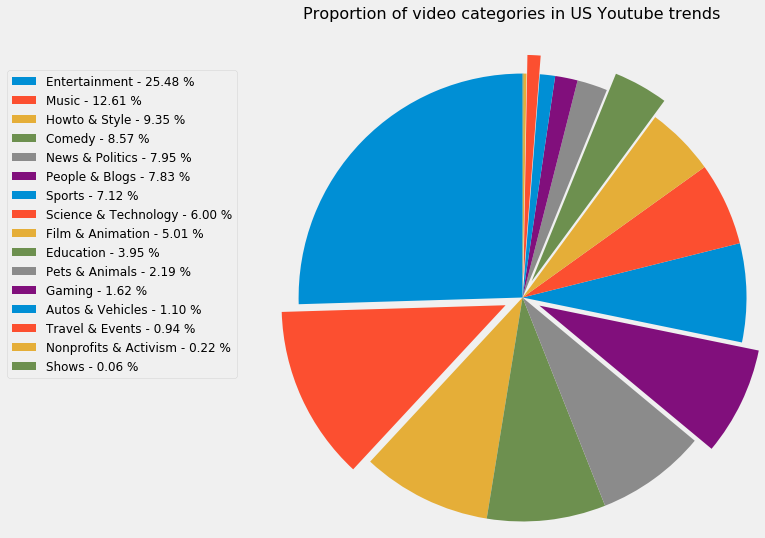

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 8))
percent = 100. *y/y.sum()
explode = (0, 0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0)
patches, texts = plt.pie(y, explode=explode, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
fig.suptitle('Proportion of video categories in US Youtube trends', fontsize=16)
#plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

Entertainment category is the one quater of all US YouTube trends. 
The second category by proportion is Music(almost 13%). 


-proportions of boolean attributes:

In [16]:
unique_video_df['comments_disabled'].value_counts()

False    6244
True      107
Name: comments_disabled, dtype: int64

In [17]:
unique_video_df['ratings_disabled'].value_counts()

False    6319
True       32
Name: ratings_disabled, dtype: int64

In [18]:
unique_video_df['video_error_or_removed'].value_counts()

False    6347
True        4
Name: video_error_or_removed, dtype: int64

By looking at head of dataframe at tags column, it seems to be that tags writing with vertical slash separation and double quotes for joining a few words to one tag is the tags structure rule. 
But how many tags are written by that rule?:

In [19]:
len(unique_video_df['tags'].unique())

5852

In [20]:
unique_video_df['tags'].value_counts()

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             261
The Late Show|"Stephen Colbert"|"Colbert"|"Late Show"|"celebrities"|"late night"|"talk show"|"skits"|"bit"|"monologue"|"The Late Late Show"|"Late Late Show"|"letterman"|"david letterman"|"comedian"|"impressions"|"CBS"|"joke"|"jokes"|"funny"|"funny video"|"funny videos"|"humor"|"celebrity"|"celeb"|"hollywood"|"famous"|"James Corden"|"Corden"|"Comedy"                                                                                                                                  

In [21]:
# checking% the same tags have videos from one channel
tags_string = 'The Late Show|"Stephen Colbert"|"Colbert"|"Late Show"|"celebrities"|"late night"|"talk show"|"skits"|"bit"|"monologue"|"The Late Late Show"|"Late Late Show"|"letterman"|"david letterman"|"comedian"|"impressions"|"CBS"|"joke"|"jokes"|"funny"|"funny video"|"funny videos"|"humor"|"celebrity"|"celeb"|"hollywood"|"famous"|"James Corden"|"Corden"|"Comedy"'

unique_video_df.loc[unique_video_df.tags == tags_string, :]

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,id,publish_time,channel_title,thumbnail_link,title,description,tags,snippet.title,trend_date_first,trend_date_last,days in trend
video_id,,,,,,,,,,,,,,,,,,
00nmxR1mxIA,833977,11517,984,1039,False,False,False,24,2017-12-09 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/00nmxR1mxIA/default.jpg,Lost 'Star Wars' Footage Of Luke Skywalker At ...,Luke Skywalker (Mark Hamill) tries to get past...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-10,2017-12-12,3
2GrKY7Qqal8,575274,6611,310,508,False,False,False,24,2017-12-12 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/2GrKY7Qqal8/default.jpg,Matt Damon Explains Why 'Good Will Hunting' Ha...,'Downsizing' star Matt Damon looks back on his...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-13,2017-12-13,1
AKmlFyQaiXo,622331,8061,1011,1062,False,False,False,24,2018-01-23 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/AKmlFyQaiXo/default.jpg,Corden On Trump: I Spanked Him,Why did Donald Trump so happily let himself be...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2018-01-24,2018-01-25,2
BHuH-vySEMA,125227,2097,63,109,False,False,False,24,2017-12-14 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/BHuH-vySEMA/default.jpg,The Late Show 'Rescue Dog Rescue' With Nick Jonas,Stephen and Nick Jonas tell some little white ...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-15,2017-12-15,1
Bf22Vq5phKo,344358,4288,133,488,False,False,False,24,2017-12-06 08:35:01+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/Bf22Vq5phKo/default.jpg,Saoirse Ronan Knows Why You Love 'Lady Bird','Lady Bird' star Saoirse Ronan explains why he...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-07,2017-12-08,2
Dc6ZDo9ViNA,887451,16114,2526,1900,False,False,False,24,2017-12-16 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/Dc6ZDo9ViNA/default.jpg,Clarice Probes Hannibal Lecter About Trump's R...,Clarice (Jodie Foster) has some questions rega...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-17,2017-12-22,6
JBw1nwYJESc,783794,10038,2827,1566,False,False,False,24,2018-01-03 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/JBw1nwYJESc/default.jpg,Anderson Cooper Walked Out Of The New 'Star Wa...,'Anderson Cooper 360' host Anderson Cooper dis...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2018-01-04,2018-01-04,1
Jiia2IcFwqk,386062,2931,244,577,False,False,False,24,2018-01-11 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/Jiia2IcFwqk/default.jpg,Sarah Jessica Parker Finally Gets Asked To Prom,'Divorce' star Sarah Jessica Parker wasn't abl...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2018-01-12,2018-01-17,6
Oy9R-z7YTRc,580342,6370,288,663,False,False,False,24,2017-12-13 08:35:00+00:00,The Late Show with Stephen Colbert,https://i.ytimg.com/vi/Oy9R-z7YTRc/default.jpg,Tom Hanks And Stephen Argue Christmas Tree Tec...,'The Post' star Tom Hanks and Stephen debate t...,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",Entertainment,2017-12-14,2017-12-14,1


In [22]:
strange_tags = unique_video_df[unique_video_df.tags.str.find('|') == -1]
strange_tags.shape

(324, 18)

So, we have 324 out of 6351 videos that don't contain vertical slash separation symbol. Let's see how tags of that videos looks like:

In [23]:
strange_tags['tags'].value_counts()

[none]                                                                                                 261
viralhog                                                                                                 5
hulu                                                                                                     3
Sia Ho Ho Ho Holiday                                                                                     2
CBS 2 News Morning                                                                                       2
Fake news david hog                                                                                      1
ece_incoming                                                                                             1
yt:cc=on                                                                                                 1
walmart                                                                                                  1
jst iotexpert iot crimping           

261 video without tags

- yt:cc=on - tag for forcing YouTube Closed Captions.

For a number of reasons, it’s increasingly common to watch online videos with captions turned on. By forcing captions to appear by default, you overcome the difficulties associated with poor audio quality and accessibility.



In [24]:
strange_tags['description'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             47
Follow Momentum Pictures!\nhttps://www.facebook.com/MomentumPics/\nhttps://www.instagram.com/momentum_pi

47 videos without description; 

### Videos of what categories was restricted in one of 3 types?

We'd consider video as restricted if comments or ratings were disabled or video was removed for some reason. Let's see what categories have a lot of that videos:

In [25]:
mask = (unique_video_df.comments_disabled == True) | (unique_video_df.ratings_disabled == True) | (unique_video_df.video_error_or_removed == True)
restriction_videos = unique_video_df.loc[mask]

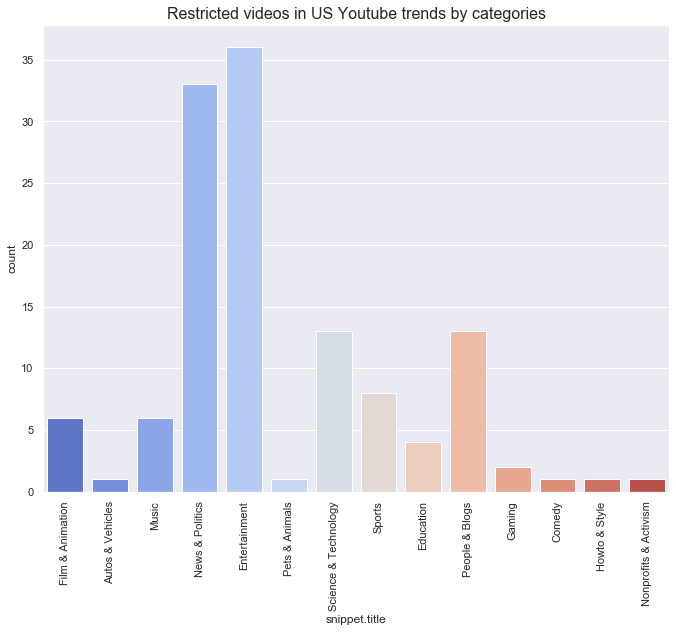

In [26]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x='snippet.title', data=restriction_videos, palette='coolwarm')
ax.set_title('Restricted videos in US Youtube trends by categories', fontsize= 16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

<p>Entertainment category has the highest number of restricted videos(that explained by the biggest proportion on trends).</p> 

<p>As we see, after Entertainment it's News&Politics. The content that somehow connected with politics is almost always controversial so maybe channel that kind of content wants to restict YouTube users activity to prevent  some kind of doubts in their target audience minds that can be caused  by negative comments of other users or big number of dislikes.</p>

<p>People & Blogs has relativly high number of restricted videos.The possible reasons are: haters that could complain on video(for, example, for violence propaganda or something other) or  copyright infringement. </p>

### Top 5 categories by views;

In [27]:
top_5_by_v = unique_video_df.groupby('snippet.title')[['views']].mean().sort_values(by='views', ascending=False)
top_5_by_v = top_5_by_v.reset_index()
top_5_by_v= top_5_by_v[:5]


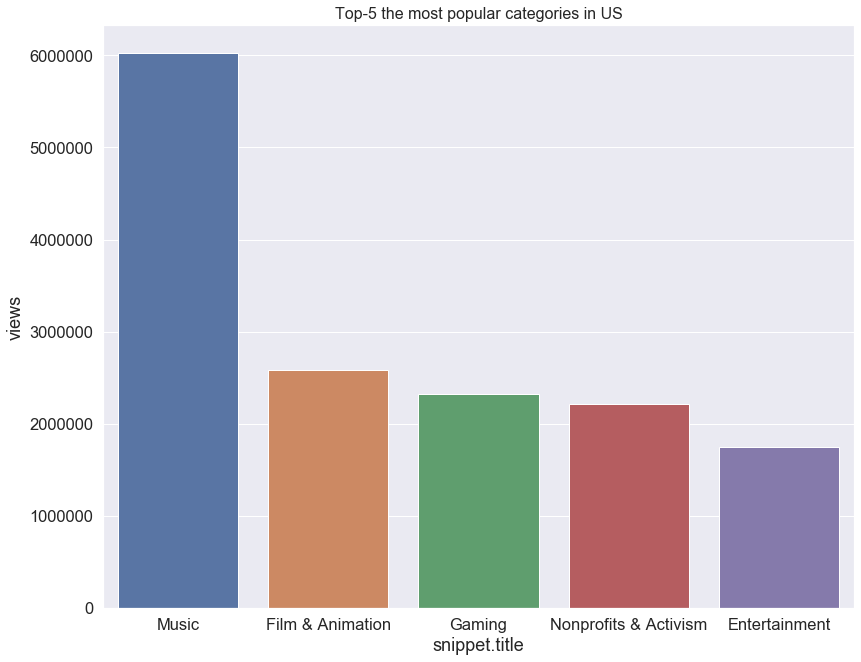

In [28]:
plt.style.use('seaborn-bright')
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='views', data=top_5_by_v)
ax.set_title('Top-5 the most popular categories in US', fontsize=16)
plt.show()

- As we see, the most popular videos category is Music. 
- Despite of high proportion in the dataset Entertainment category are on the 5th place by the total views.

### Top-5 popular channels

In [29]:
top_5_channels = unique_video_df.groupby('channel_title')[['views']].mean().sort_values(by='views', ascending=False)
top_5_channels  = top_5_channels.reset_index()
top_5_channels = top_5_channels [:5]

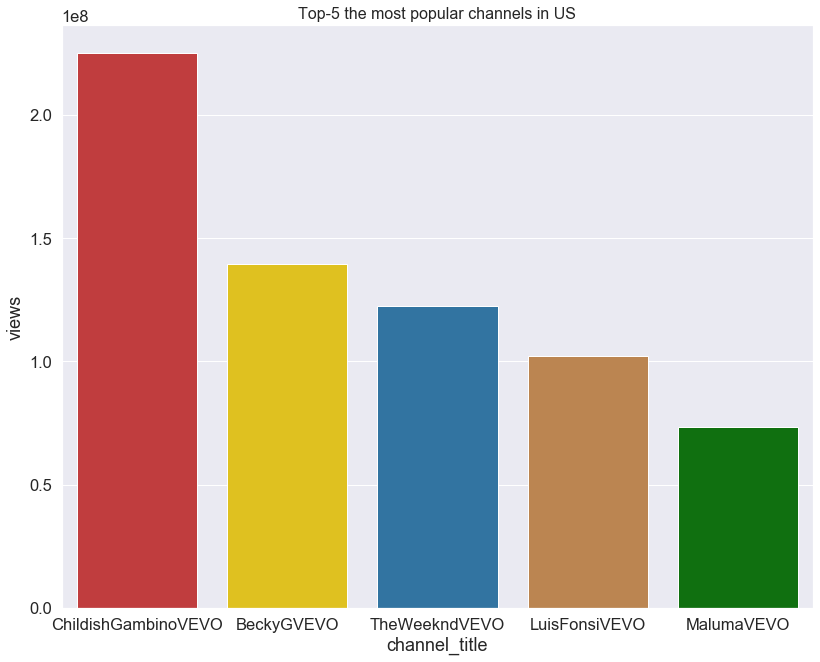

In [30]:
colors=['tab:red','gold', 'tab:blue','peru', 'green']

plt.style.use('seaborn-bright')
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='channel_title', y='views', data=top_5_channels, palette=sns.color_palette(colors))
ax.set_title('Top-5 the most popular channels in US', fontsize=16)
plt.show()

All top5 channels are Vevo channels(Vevo is a video hosting service owned and operated by a joint venture of Universal Music Group (UMG), Google, Sony Music Entertainment (SME) and Abu Dhabi Media) so it's Music category.

## Features extraction 

<ul> 
    <li>Extract information about title and description changes</li>
    <li>Detect language of tags</li>
    <li>Positive reaction coefficient(proportion of likes out of likes+ dislikes)</li>
    <li>Audience engagement coeffcient(how many comments out of all views)</li>
    <li>URLs number</li>
    <li> Difference between max and min views(first and last day in trends)</li>
    <li>In what times of the day video was published?</li>    
</ul>

#### Extract information about title and description changes

In [31]:
all_videos_unique = video_us['video_id'].unique()
video_changed_adiitional_info = pd.DataFrame(index=all_videos_unique, columns=['title_changed', 'desc_changed', 'tags_changed'], dtype=bool)
video_changed_adiitional_info.index.name='video_id'
for index, row in video_changed_adiitional_info.iterrows(): 
    videos_group = video_us.loc[video_us['video_id'].isin([index]), ['title', 'description', 'tags']]
    
    if len(videos_group['title'].unique()) == 1: 
        row['title_changed'] = False
    else: 
        row['title_changed'] = True
    
    if len(videos_group['description'].unique()) == 1: 
        row['desc_changed'] = False
    else: 
        row['desc_changed'] = True 
    
    if len(videos_group['tags'].unique()) == 1: 
        row['tags_changed'] = False
    else: 
        row['tags_changed'] = True 

unique_video_df = pd.concat([unique_video_df, video_changed_adiitional_info], axis=1, sort=True)   


#### Proportion of *_changed features in dataset

In [32]:
unique_video_df['title_changed'].value_counts()

False    6242
True      109
Name: title_changed, dtype: int64

In [33]:
unique_video_df['desc_changed'].value_counts()

False    5722
True      629
Name: desc_changed, dtype: int64

In [34]:
unique_video_df['tags_changed'].value_counts()

False    6160
True      191
Name: tags_changed, dtype: int64

####  Detect language of tags

In [35]:

## delete all punctuation symbols from tags

for index, row in unique_video_df.iterrows():
    tags =  row['tags']
    tags = tags.translate(str.maketrans('', '', string.punctuation))
    tags = ''.join(x for x in tags if x in string.printable)
    tags_langs = Detector(tags, quiet=True).languages
    tags_langs = [lan.code for lan in tags_langs if lan.read_bytes != 0]
    unique_video_df.loc[index, 'languages_number'] = len(tags_langs) 

unique_video_df.loc[unique_video_df['languages_number'] == 0, 'languages_number'] = 1

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

#### Positive reaction coefficient

In [36]:
unique_video_df['pos_react_coef'] = unique_video_df['likes'] / (unique_video_df['likes'] + unique_video_df['dislikes'])
unique_video_df['pos_react_coef'].fillna(0, inplace=True)

#### Audience engagment

In [37]:
unique_video_df['engagment_coef_2'] = unique_video_df['comment_count'] / unique_video_df['views']


#### URLs number

In [38]:

def count_url(desc): 
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',  desc)
    
    if urls is not None:
        return len(list(urls))  
    else: 
        return 0


unique_video_df['url_count'] = unique_video_df['description'].apply(lambda x: count_url(x))


#### Difference between max and min views(first and last day in trends)

In [39]:
views_group = video_us.groupby('video_id')['views'].agg(['max', 'min'])

views_group['views_diff'] = views_group['max'] - views_group['min']

unique_video_df = pd.concat([unique_video_df, views_group], axis=1, sort=True)


#### In what times of the day video was published?

In [40]:
def times_of_day(hour):
    times = ''
    if hour in range(18, 24): 
        times = 'evening'
    elif hour in range(13, 17): 
        times = 'afternoon'
    elif hour in range(6, 12):
        times = 'morning'    
    else: 
        times = 'night'
    return times    
    
unique_video_df['times_of_day'] = (unique_video_df['publish_time'].dt.hour).apply(lambda x: times_of_day(x))



### Correlation plot 

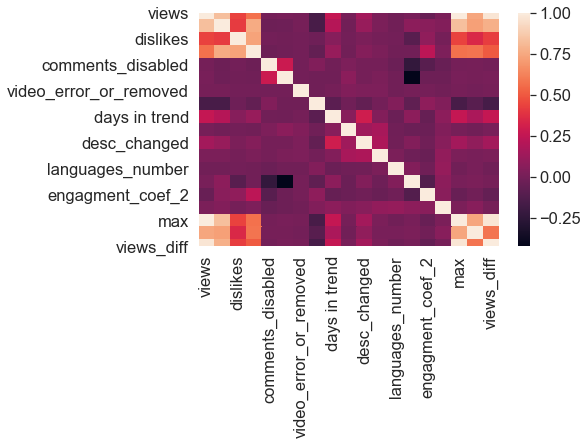

In [41]:
sns.heatmap(unique_video_df.corr())
plt.show()

#### Comments count and likes by category by lang_cat

Check if videos that have multilingual tags have higher comments number: 

In [42]:
cc_gr = unique_video_df.groupby(['snippet.title', 'languages_number'])[['comment_count']].mean()
cc_gr = cc_gr.reset_index()

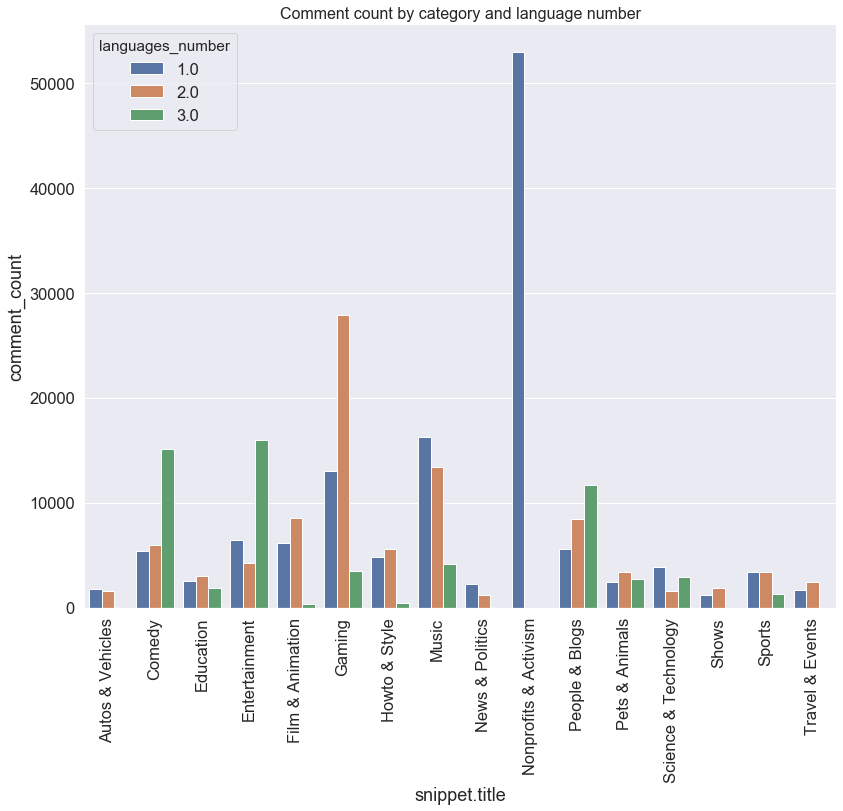

In [43]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='comment_count', hue='languages_number', data=cc_gr)
ax.set_title('Comment count by category and language number', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()    

As we can see, our assumption was correct only for Comedy, Entertainment and People&Blogs categories. 
Nonprofits&Activism has the highest mean comment number and not multilingual(it's no suprise, cause it is US trends and this kind of content about US society problems). It seems logical, because content about social problems caused strong reaction in the society.

### Compare users loyality for diffenent video categories

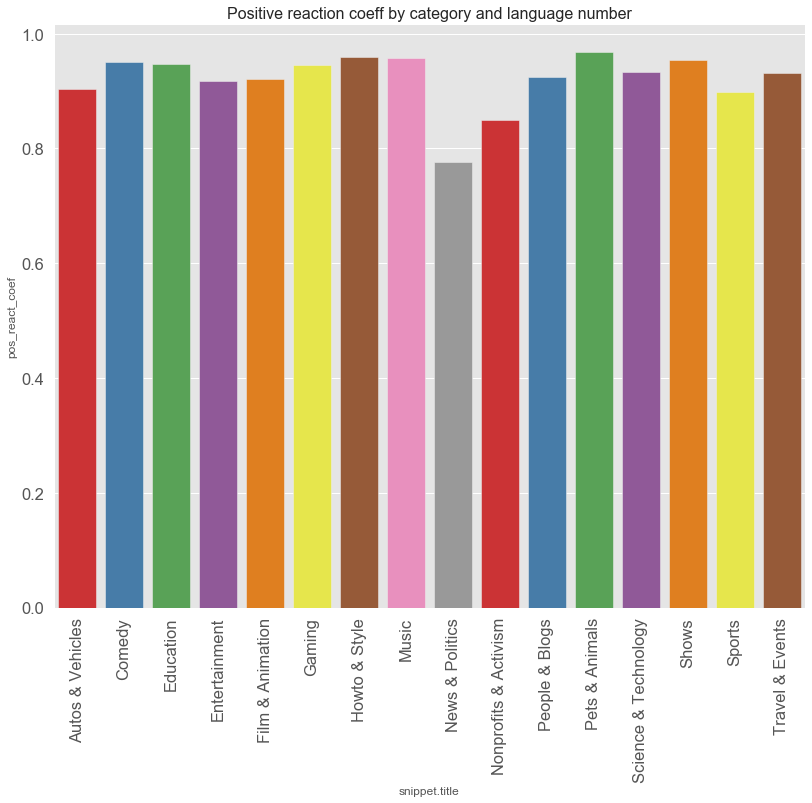

In [44]:
gr = unique_video_df.groupby(['snippet.title'])[['pos_react_coef']].mean()
gr = gr.reset_index()

plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='pos_react_coef', data=gr, palette="Set1")
ax.set_title('Positive reaction coeff by category and language number', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()    


<p>The lowest mean positive reaction coefficient for News&Politics confirm asumption about restrictions in videos.</p>

<p>Video categories that caused positive audience reaction: 
 <ul> 
    <li>Pets&Animals</li>
    <li>Music</li> 
    <li>Howto&Style</li>
    <li>Shows</li>
    <li>Comedy</li>
    <li>Education</li> 
 </ul>
</p>

### Compare audience engagement in different categories

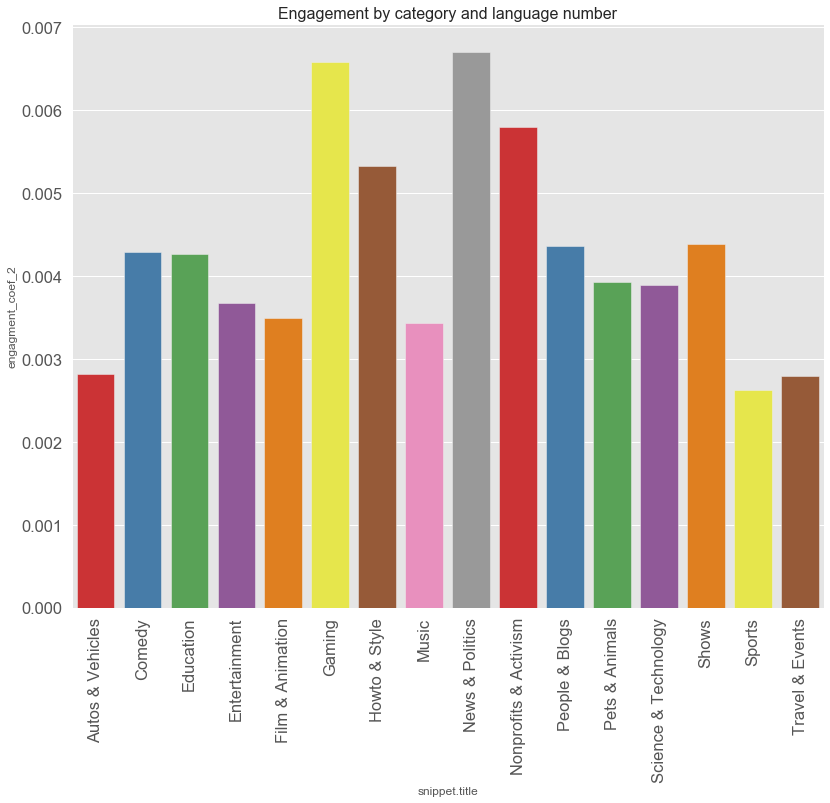

In [45]:
gr = unique_video_df.groupby(['snippet.title'])[['engagment_coef_2']].mean()
gr = gr.reset_index()

plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='engagment_coef_2', data=gr, palette="Set1")
ax.set_title('Engagement by category and language number', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

<p>Despite of high proportion of videos with restrictions,  News&Politics has the highest engagement! </p>

<p>Gaming category is the second by engagement strenght. This category has a special target audience that in have the strong interest in the topic in advance(people how don't like games won't even watch that videos, not to metion comments). </p>


## Top 10 words in descrition and tags

In [46]:
from nltk.corpus import stopwords

all_video_categories = list(unique_video_df['snippet.title'].unique())

stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_en = set(stopwords.words('english'))
stopwords_withpunct = set(punctuation)
stopwords_json_en = set(stopwords_json['en'])
stoplist_combined = set.union(stopwords_json_en, stopwords_en, stopwords_withpunct)


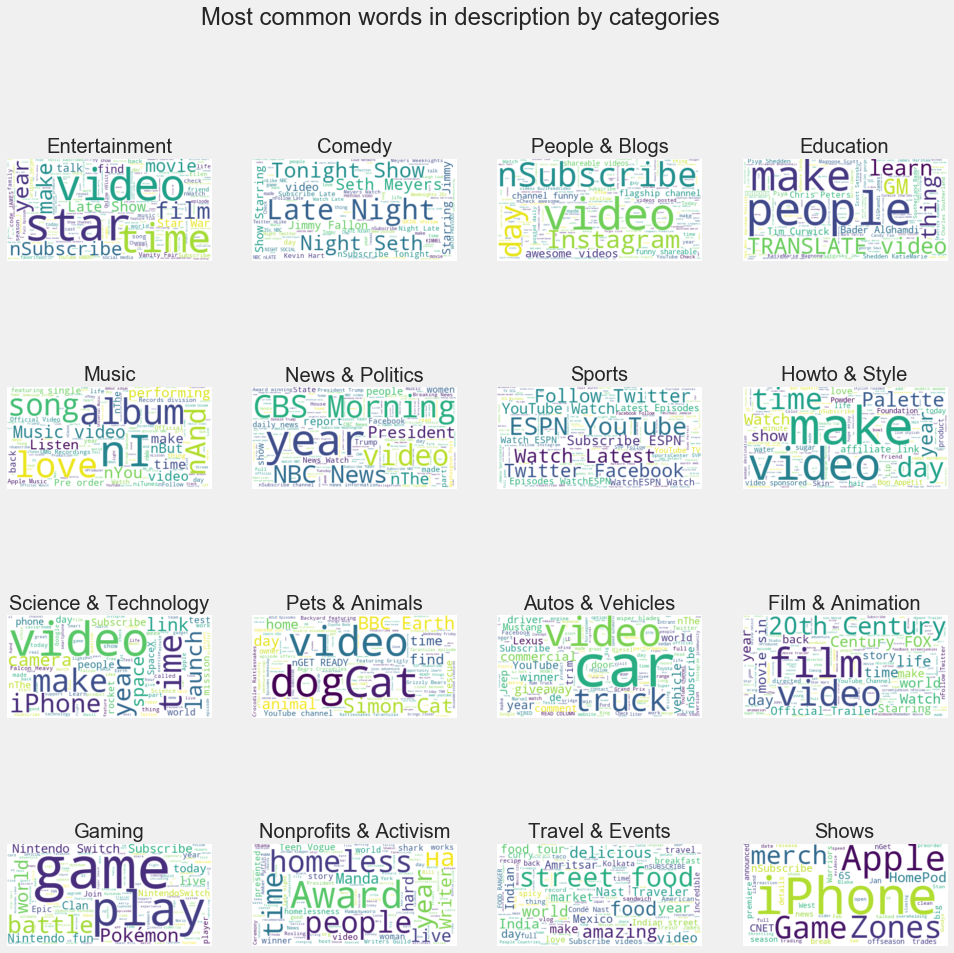

In [47]:

url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
unique_video_df['description'] = unique_video_df['description'].apply(lambda x: re.sub(url_regex, '', x))

desc_cat_text = []

for cat in all_video_categories:
    string = " ".join(review for review in unique_video_df[unique_video_df["snippet.title"]==cat].description)
    desc_cat_text.append(string)

plt.style.use('fivethirtyeight')
nrow = 4; ncol = 4;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow, figsize=(15, 15))
axs = np.array(axs)

stopwords = set(STOPWORDS)
fig.suptitle('Most common words in description by categories', fontsize=24)
for i, ax in enumerate(fig.axes):
    wordcloud = WordCloud(stopwords=stoplist_combined, background_color="white")
    wordcloud.generate(desc_cat_text[i])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(all_video_categories[i])

plt.show()


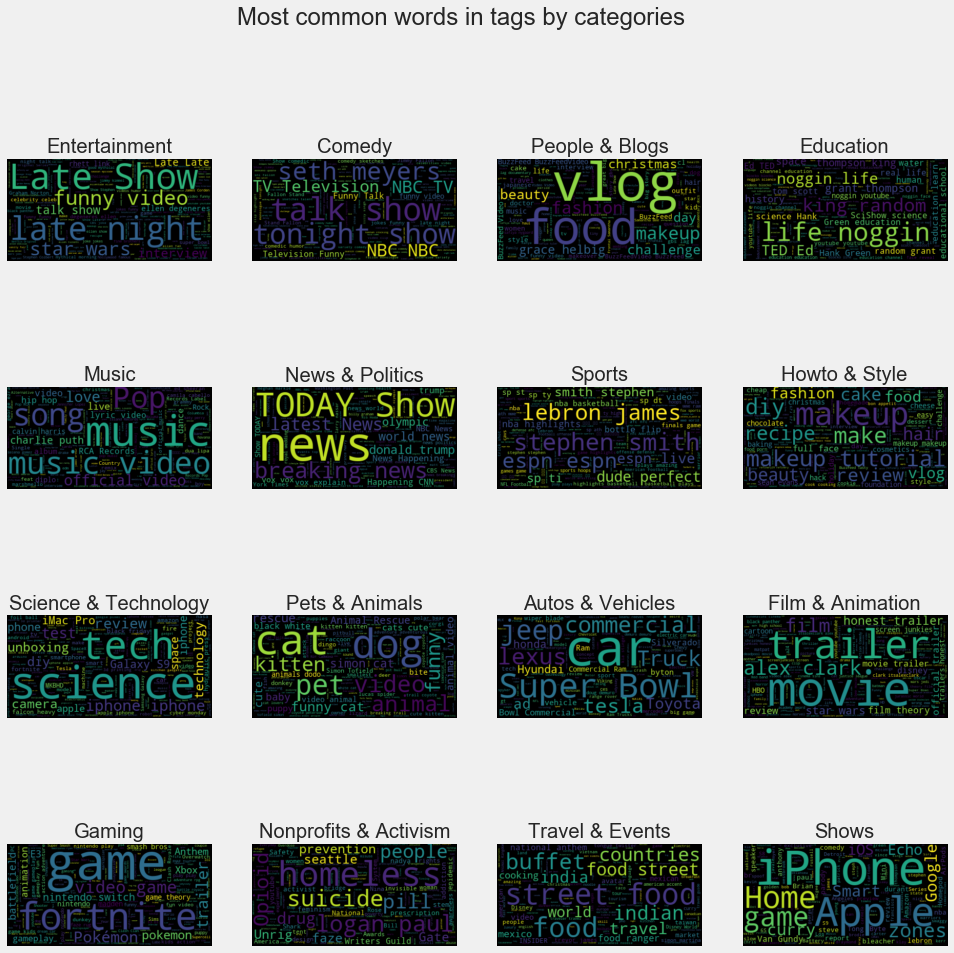

In [48]:
# FOR TAGS

url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
unique_video_df['tags'] = unique_video_df['tags'].apply(lambda x: re.sub(url_regex, '', x))

tags_cat_text = []

for cat in all_video_categories:
    string = " ".join(review for review in unique_video_df[unique_video_df["snippet.title"]==cat].tags)
    tags_cat_text.append(string)

plt.style.use('fivethirtyeight')
nrow = 4; ncol = 4;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow, figsize=(15, 15))
axs = np.array(axs)

stopwords = set(STOPWORDS)
fig.suptitle('Most common words in tags by categories', fontsize=24)
for i, ax in enumerate(fig.axes):
    wordcloud = WordCloud(stopwords=stoplist_combined, background_color="black")
    wordcloud.generate(tags_cat_text[i])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(all_video_categories[i])

plt.show()

### How some changes affects the popularity?

In [49]:
for index, row in unique_video_df.iterrows():
    tags = row['tags_changed']
    desc = row['desc_changed']
    title = row['title_changed']
    
    if (tags == True) | (desc == True) | (title == True): 
        unique_video_df.loc[index, 'is_changed'] = True
    else: 
        unique_video_df.loc[index, 'is_changed'] = False

In [50]:
unique_video_df['is_changed'].value_counts()

False    5556
True      795
Name: is_changed, dtype: int64

<Figure size 720x576 with 0 Axes>

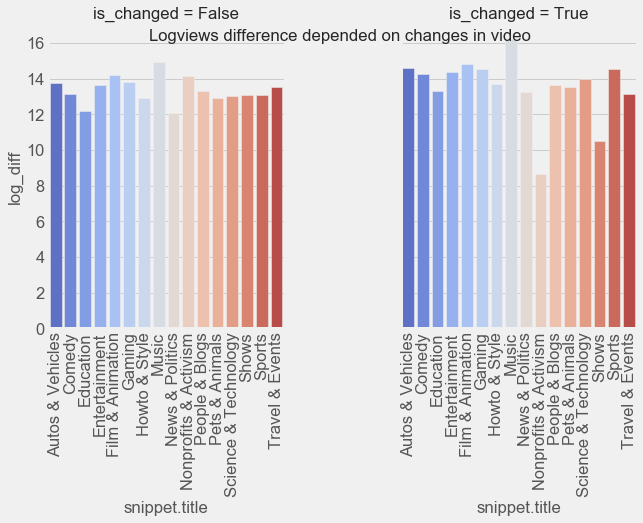

In [51]:
diff_group = unique_video_df.groupby(['snippet.title', 'is_changed'])['views_diff'].mean().reset_index()

diff_group['log_diff'] = np.log(diff_group['views_diff'])

plt.figure(figsize=(10, 8))

g = sns.catplot(x='snippet.title', y='log_diff', col='is_changed', 
            data=diff_group, kind='bar', palette='coolwarm')
for ax in g.axes.flat: 
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
g.fig.subplots_adjust(top=0.99)       
g.fig.suptitle('Logviews difference depended on changes in video')
plt.show()


- Music and Nonprofits&Activism have the highest different in views after being in trends among of videos that was not changed.
- In general, video that was changed have the higher improvement in views (except Nonprofits&Activism and Shows)

### What categories have the highest increase in views after being in trends?

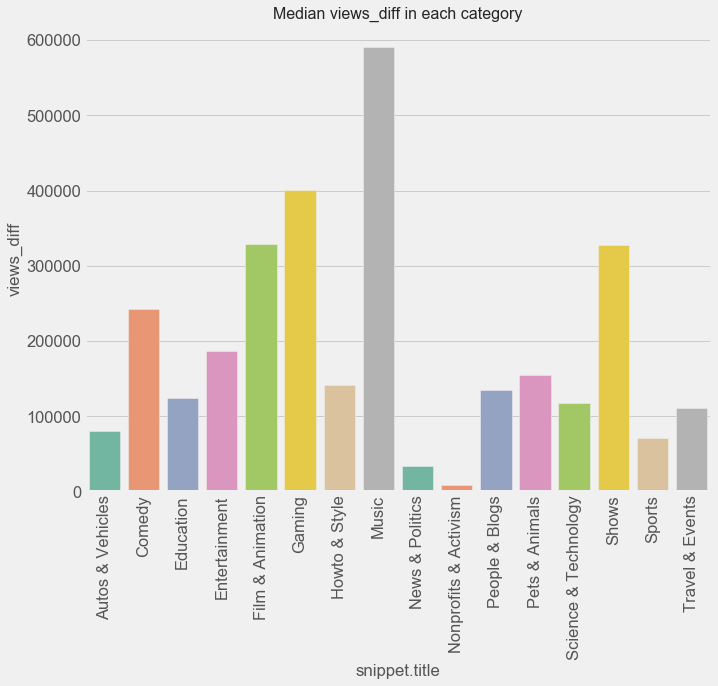

In [52]:
description_group = unique_video_df.groupby('snippet.title')['views_diff'].median().reset_index()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='snippet.title', y='views_diff', data=description_group, palette = 'Set2')
ax.set_title('Median views_diff in each category', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show() 

### Is restrictions influence on views?

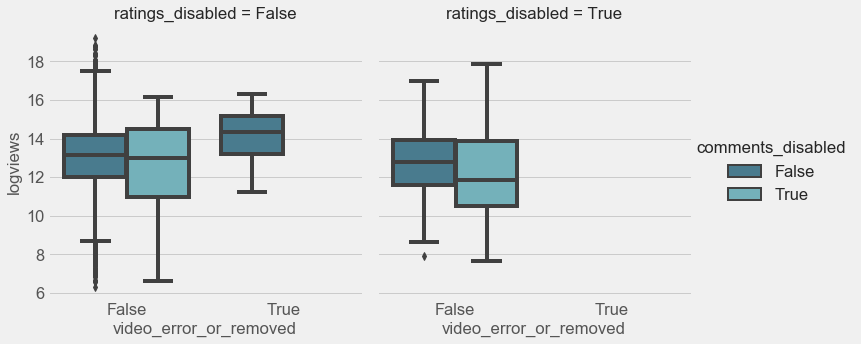

In [53]:
unique_video_df['logviews'] = np.log(unique_video_df['views'])

sns.catplot(x='video_error_or_removed', y='logviews', hue='comments_disabled', col='ratings_disabled', 
            data=unique_video_df, kind='box', palette='GnBu_d')
plt.show()

Videos that was removed and have ratings enabled and comments disabled have higher mean views

### How language influence on views in different categories? 

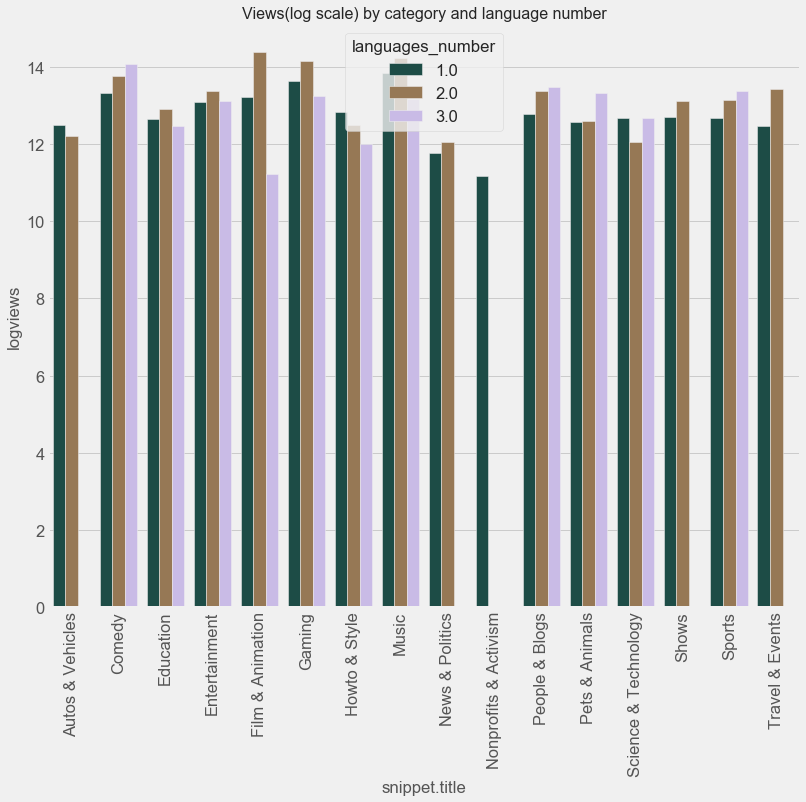

In [54]:
v_gr = unique_video_df.groupby(['snippet.title', 'languages_number'])[['logviews']].mean()
v_gr = v_gr.reset_index()


plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='logviews', hue='languages_number', data=v_gr, palette='cubehelix')
ax.set_title('Views(log scale) by category and language number', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show() 

Here we have the similar pattern like in the comments_count by languages plot

## What categories in trend longer than other?

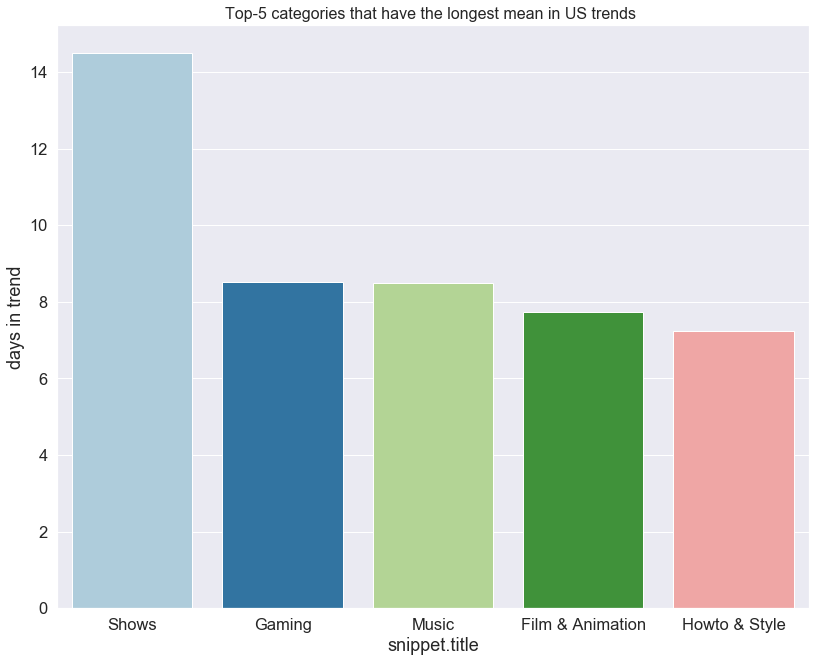

In [55]:
top_5 = unique_video_df.groupby('snippet.title')[['days in trend']].mean().sort_values(by='days in trend', ascending=False)
top_5 = top_5.reset_index()
top_5= top_5[:5]

sns.set(font_scale=1.5)
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='snippet.title', y='days in trend', data=top_5, palette= "Paired")
ax.set_title('Top-5 categories that have the longest mean in US trends ', fontsize=16)
plt.show()

On average, Show videos stay in trend on more than 6 days longer than Gaming and Music videos !

## What channels have the highest day in trends?

In [56]:
chanels_dtr = unique_video_df.groupby(['snippet.title', 'channel_title'])[['days in trend']].mean().sort_values(by='days in trend', ascending=False)
chanels_dtr.head(10)

days in trend
snippet.title    channel_title                           
Music            TheWeekndVEVO                       31.0
                 Nicki Minaj                         30.0
Howto & Style    DaveHax                             30.0
Entertainment    Carter Sharer                       29.0
Film & Animation Selena Gomez                        29.0
Music            杰威爾音樂 JVR Music                     28.0
                 johnmayerVEVO                       28.0
People & Blogs   TED                                 27.0
Comedy           ThatcherJoe                         27.0
Entertainment    Global Road Entertainment           27.0

## What channels have the highest mean views values?

In [57]:
chanels_view = unique_video_df.groupby(['snippet.title', 'channel_title'])[['views']].mean().sort_values(by='views', ascending=False)
chanels_view.head(10)

views
snippet.title    channel_title                    
Music            ChildishGambinoVEVO  2.252119e+08
                 BeckyGVEVO           1.393345e+08
                 TheWeekndVEVO        1.225449e+08
                 LuisFonsiVEVO        1.020126e+08
                 Cardi B              9.425451e+07
                 MalumaVEVO           7.357084e+07
                 DrakeVEVO            6.063581e+07
People & Blogs   Kylie Jenner         5.611196e+07
Film & Animation Selena Gomez         5.486391e+07
Music            ArianaGrandeVevo     5.091159e+07

## URLs number in different categories?

A lot of urls in video description may be an indicator of intensive advertising or promotion, so that videos have the high commercial potential. 

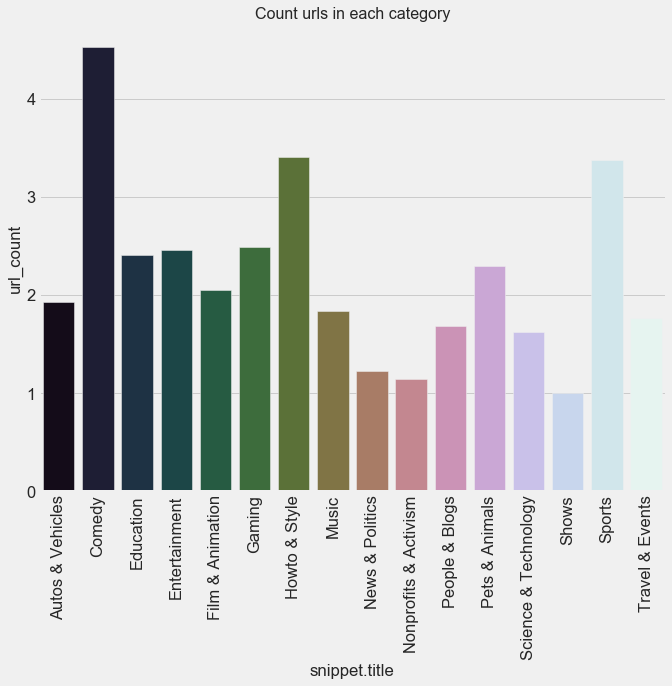

In [58]:
urls = unique_video_df.groupby('snippet.title')[['url_count']].mean().reset_index()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='snippet.title', y='url_count', data=urls, palette = 'cubehelix')
ax.set_title('Count urls in each category', fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show() 

In average, Comedy video category has more than 4 url in description

# Video categories classification

## Prepare data for model

In [59]:
unique_video_df.drop(['thumbnail_link', 'trend_date_first', 
                      'trend_date_last', 'max', 'min', 'publish_time',
                       'channel_title', 'id'], axis=1, inplace=True)
unique_video_df.drop(['is_changed', 'logviews'], axis=1, inplace=True)

In [60]:
scaler = StandardScaler()

n_cols = ['views', 'likes', 'dislikes', 'comment_count', 'days in trend', 
           'languages_number',  'url_count', 'views_diff']


unique_video_df[n_cols] = scaler.fit_transform(unique_video_df[n_cols])

from sklearn.preprocessing import LabelEncoder

unique_video_df['times_of_day'] = LabelEncoder().fit_transform(unique_video_df['times_of_day'])

unique_video_df['snippet.title'] = LabelEncoder().fit_transform(unique_video_df['snippet.title'])

### Text features preperation

In [61]:
## code from kaggle 'basics of nltk' kernel
## PREPROCESSING TEXT;
from nltk.corpus import stopwords

stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_en = set(stopwords.words('english'))
stopwords_withpunct = set(punctuation)
stopwords_json_en = set(stopwords_json['en'])
stoplist_combined = set.union(stopwords_json_en, stopwords_en, stopwords_withpunct)


wnl =  WordNetLemmatizer()

def penn2morphy(penntag): 
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    
    try: 
        return morphy_tag[penntag[:2]]
    except:
        return 'n' # if mapping isn't found, fall back to Noun.
    
    # `pos_tag` takes the tokenized sentence as input, i.e. list of string,
# and returns a tuple of (word, tg), i.e. list of tuples of strings
# so we need to get the tag from the 2nd element.



def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

def preprocess_text(text): 
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined 
            and not word.isdigit()]

In [62]:
y = unique_video_df['snippet.title']

cols = list(unique_video_df.columns)

cols.remove('snippet.title')
cols.remove('tags')
cols.remove('description')
cols.remove('title')

In [63]:
# Create vectorizer for function to use
tags = CountVectorizer(analyzer=preprocess_text).fit_transform(unique_video_df['tags'])
desc = CountVectorizer(analyzer=preprocess_text).fit_transform(unique_video_df['description'])
title = CountVectorizer(analyzer=preprocess_text).fit_transform(unique_video_df['title'])


X = sp.sparse.hstack((tags,desc,title,unique_video_df[cols].astype('float64').values),format='csr')



### Split on test and train set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model selection

### Random forest

In [65]:
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [66]:
print(accuracy_score(y_test, y_pred))

0.6783840503672612


In [67]:
unique_video_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, -0CMnp02rNY to zzQsGL_F9_c
Data columns (total 21 columns):
views                     6351 non-null float64
likes                     6351 non-null float64
dislikes                  6351 non-null float64
comment_count             6351 non-null float64
comments_disabled         6351 non-null bool
ratings_disabled          6351 non-null bool
video_error_or_removed    6351 non-null bool
title                     6351 non-null object
description               6351 non-null object
tags                      6351 non-null object
snippet.title             6351 non-null int64
days in trend             6351 non-null float64
title_changed             6351 non-null bool
desc_changed              6351 non-null bool
tags_changed              6351 non-null bool
languages_number          6351 non-null float64
pos_react_coef            6351 non-null float64
engagment_coef_2          6351 non-null float64
url_count                 6351 non-null 

### Logistic regression

In [68]:
clf = LogisticRegression(random_state=0, solver='saga',
                         class_weight='balanced')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6878279118572928


### SVM

In [69]:
svc = svm.SVC(gamma='scale', decision_function_shape='ovo')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.4459601259181532


# SGDClassifier

In [70]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd = sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.4559286463798531


### ADA boost

In [71]:
ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(X_train,  y_train)

y_pred = ada.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.2602308499475341


### KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.44491080797481636


### XGBoost

In [73]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7119622245540399


### Learning curve

In [74]:
# code from sklearn official website

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

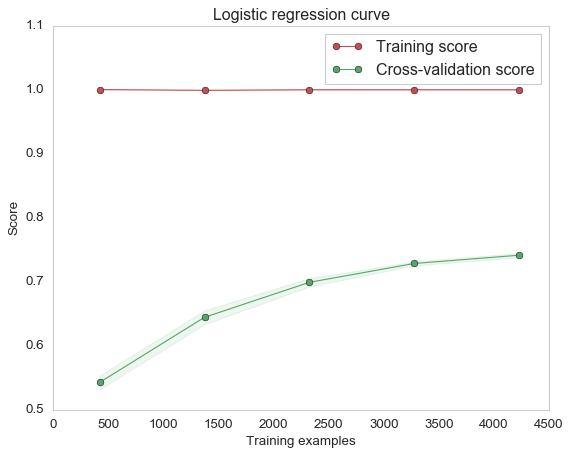

In [77]:

import matplotlib as mpl
mpl.style.use('classic')
sns.set_style("whitegrid") 

title='Logistic regression curve'
plot_learning_curve(LogisticRegression(), title, X, y,n_jobs=-1)
plt.show() 

As we can see at learning curve plot of logistic regression, it suffers from overfitting; 
__What can be done to fix overfitting problem:__
  - try regulrization with big regularization parameter(increasing reg.param)
  - try smaller set of features; 

## Try logistic regression with stronger regularization; 


In [78]:

lr = LogisticRegression(C=0.25, random_state=0, solver='lbfgs',
                          multi_class='multinomial')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7229800629590766


In [ ]:
# # Create grid search using 5-fold cross validation
# estimator = LogisticRegression( solver='lbfgs', multi_class='multinomial')
# hyperparameters = {'C': np.linspace(0.01, 1)}
# grid = GridSearchCV(estimator, hyperparameters, cv=5, verbose=0)

# best = grid.fit(X, y)
# print(best.best_estimator_.get_params())

In [55]:
print('Best score:')
print(best.best_score_)

Best score:
0.7801920957329554


So, we got the same results as without changing regularization parameters. 
In conclusion, the most likely reason of overfitting is that our dataset is __class-imbalanced__. 
To fix that, problem, let's try __sampling method__:

In [80]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 

clf  = LogisticRegression(solver='newton-cg') 

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X_resampled, y_resampled, cv=cv) 

array([0.97360628, 0.97360628, 0.97193254, 0.97128879, 0.97051629])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

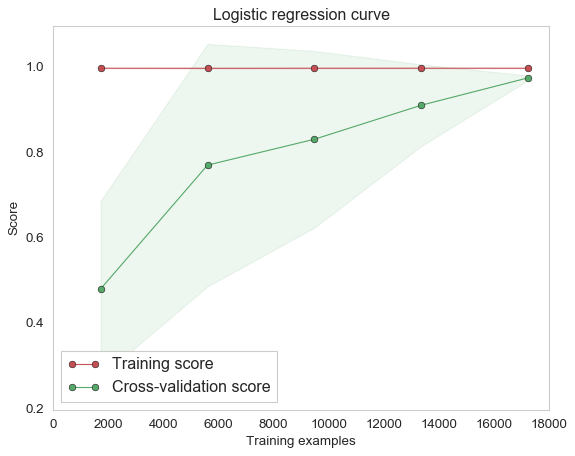

In [82]:
clf2  = LogisticRegression(solver='newton-cg')
title='Logistic regression curve'
plot_learning_curve(clf2,title, X_resampled, y_resampled, n_jobs=-1)

In [83]:
# roc_auc for multiclass problem 

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


lg = LogisticRegression(solver='newton-cg')

lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

print(multiclass_roc_auc_score(y_test, y_pred))

0.9864287133471726
